In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/open?id=185h2K7e-cttSDlfI04ubltb3tYYBCQN8'  

In [ ]:
fluff, id = link.split('=')
print (id)

185h2K7e-cttSDlfI04ubltb3tYYBCQN8


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('news.csv')  
df3 = pd.read_csv('news.csv')

In [ ]:
headlines=df3["headline_text"]
headlines.head()

0    aba decides against community broadcasting lic...
1       act fire witnesses must be aware of defamation
2       a g calls for infrastructure protection summit
3             air nz staff in aust strike for pay rise
4        air nz strike to affect australian travellers
Name: headline_text, dtype: object

In [ ]:
#importing NLTK
import nltk
nltk.download("popular")
nltk.download('vader_lexicon')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
#Timebeing we consider the top 100 headlines alone
headlines=headlines[:1000]

In [ ]:
#This part of the code finds the polarity for each headline.
#polarity_scores in nltk package does that for us:/
#It basically classifies into +ve,-Ve and neutral
#The compound score is like the aggregate score
#It lies bw -1(extremely -ve) to +1(+ve)


from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

results[:5]

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[{'compound': 0.0,
  'headline': 'aba decides against community broadcasting licence',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': -0.34,
  'headline': 'act fire witnesses must be aware of defamation',
  'neg': 0.255,
  'neu': 0.745,
  'pos': 0.0},
 {'compound': 0.0,
  'headline': 'a g calls for infrastructure protection summit',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': -0.2263,
  'headline': 'air nz staff in aust strike for pay rise',
  'neg': 0.293,
  'neu': 0.707,
  'pos': 0.0},
 {'compound': -0.128,
  'headline': 'air nz strike to affect australian travellers',
  'neg': 0.2,
  'neu': 0.8,
  'pos': 0.0}]

In [ ]:
#We form a dataframe

df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headline
0,0.000,1.000,0.0,0.0000,aba decides against community broadcasting lic...
1,0.255,0.745,0.0,-0.3400,act fire witnesses must be aware of defamation
2,0.000,1.000,0.0,0.0000,a g calls for infrastructure protection summit
3,0.293,0.707,0.0,-0.2263,air nz staff in aust strike for pay rise
4,0.200,0.800,0.0,-0.1280,air nz strike to affect australian travellers


In [ ]:
#We are asssigning the headlines a label based on the compound score

df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df[:10]

,neg,neu,pos,compound,headline,label
0,0.000,1.000,0.000,0.0000,aba decides against community broadcasting lic...,0
1,0.255,0.745,0.000,-0.3400,act fire witnesses must be aware of defamation,-1
2,0.000,1.000,0.000,0.0000,a g calls for infrastructure protection summit,0
3,0.293,0.707,0.000,-0.2263,air nz staff in aust strike for pay rise,-1
4,0.200,0.800,0.000,-0.1280,air nz strike to affect australian travellers,0
5,0.000,0.306,0.694,0.7783,ambitious olsson wins triple jump,1
6,0.000,0.602,0.398,0.5106,antic delighted with record breaking barca,1
7,0.000,1.000,0.000,0.0000,aussie qualifier stosur wastes four memphis match,0
8,0.000,0.714,0.286,0.3400,aust addresses un security council over iraq,1
9,0.394,0.606,0.000,-0.5994,australia is locked into war timetable opp,-1


In [ ]:
from nltk.tokenize import word_tokenize, RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
def process_text(headlines):
    tokens = []
    for line in headlines:
        toks = tokenizer.tokenize(line)
        print(toks)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens

In [ ]:
lines = list(df.headline)

tokens = process_text(lines)
freq = nltk.FreqDist(tokens)

freq.most_common(20)
word_features=list(freq.keys())


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
cf=[df['headline'].values,df['label'].values]
X_train, X_test = train_test_split((df['headline'].values, 
                 df['label'].values),        
                 test_size=0.2)
#print(X_train,X_test)
#print(df.drop(['neu'],axis=1))
#df.drop(['compound','pos','neg','neu'],axis=1)
#df.drop(['compound','pos','neg','neu'],axis=1)

featuresets = pd.DataFrame(df,columns=['headline','label'])
#hf=df['headline'].append(df['label'],ignore_index=True)
print(featuresets)

                                              headline  label
0    aba decides against community broadcasting lic...      0
1       act fire witnesses must be aware of defamation     -1
2       a g calls for infrastructure protection summit      0
3             air nz staff in aust strike for pay rise     -1
4        air nz strike to affect australian travellers      0
..                                                 ...    ...
995                conference to focus on tuna fishery      0
996                      council hosts farewell for mp      0
997                council resists eba roster pressure     -1
998                   customs house restoration opened      0
999              dam water levels still critically low     -1

[1000 rows x 2 columns]


In [ ]:
import random

In [ ]:
documents=[]
for i in range(len(featuresets)):
  toks = tokenizer.tokenize(featuresets.iloc[i][0])
  documents.append((toks,featuresets.iloc[i][1]))

  
random.shuffle(documents)



In [ ]:
def find_features(document):
    words = set(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features

#print((find_features(movie_reviews.words('neg/cv000_29416.txt'))))

featuresets = [(find_features(rev), category) for (rev, category) in documents]


In [ ]:
featuresets[0]

({'aba': False,
  'decides': False,
  'community': False,
  'broadcasting': False,
  'licence': False,
  'act': False,
  'fire': False,
  'witnesses': False,
  'must': False,
  'aware': False,
  'defamation': False,
  'g': False,
  'calls': False,
  'infrastructure': False,
  'protection': False,
  'summit': False,
  'air': False,
  'nz': False,
  'staff': False,
  'aust': False,
  'strike': False,
  'pay': False,
  'rise': False,
  'affect': False,
  'australian': False,
  'travellers': False,
  'ambitious': False,
  'olsson': False,
  'wins': False,
  'triple': False,
  'jump': False,
  'antic': False,
  'delighted': False,
  'record': False,
  'breaking': False,
  'barca': False,
  'aussie': False,
  'qualifier': False,
  'stosur': False,
  'wastes': False,
  'four': False,
  'memphis': False,
  'match': False,
  'addresses': False,
  'un': False,
  'security': False,
  'council': False,
  'iraq': False,
  'australia': False,
  'locked': False,
  'war': False,
  'timetable': False,


In [ ]:
import nltk.classify
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from nltk.classify.scikitlearn import SklearnClassifier
LogisticRegression_classifier = SklearnClassifier(LogisticRegression())
X_train = featuresets[:900]
LogisticRegression_classifier.train(X_train)
classifier3=LogisticRegression_classifier.train(X_train)



# set that we'll test against.
X_test = featuresets[850 :]
test1="India won the finals"
temp=find_features(test1)
#print(temp)
#pred3=classifier3.predict(X_test)

#fpr, tpr, thresholds = roc_curve(X_test, pred3)
#plt.plot(fpr, tpr, c = 'g', linewidth = 4)
print("LogisticRegression_classifier accuracy percent:", (nltk.classify.accuracy(LogisticRegression_classifier, X_test))*100)
classifier1 = nltk.NaiveBayesClassifier.train(X_train)
print("NaiveBayesClassifier accuracy percent:",(nltk.classify.accuracy(classifier1, X_test))*100)
#classifier2 = nltk.SvmClassifier.train(X_train)
classifier2 = nltk.classify.SklearnClassifier(LinearSVC())

classifier2.train(X_train)
print("LinearSVM_Classifier accuracy percent:",(nltk.classify.accuracy(classifier2, X_test))*100)

classifier4 = nltk.DecisionTreeClassifier.train(X_train)
#print("Classifier accuracy percent:",(nltk.classify(temp)))



print("DecsionTreeClassifier accuracy percent:",(nltk.classify.accuracy(classifier4, X_test))*100)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression_classifier accuracy percent: 75.33333333333333
NaiveBayesClassifier accuracy percent: 70.66666666666667
LinearSVM_Classifier accuracy percent: 77.33333333333333
DecsionTreeClassifier accuracy percent: 72.0


In [ ]:
def label2int(label):
    #print(label)
    if label == 1:
        return 1
    elif label == 0:
        return 0
    else:
      return -1

y_true, y_score = [], []


Precision-Recall AUC: 0.6798809523809524
ROC AUC: 0.7078454332552693
              precision    recall  f1-score   support

          -1       0.74      0.67      0.70       110
           0       0.66      0.88      0.75       134
           1       1.00      0.36      0.53        56

    accuracy                           0.71       300
   macro avg       0.80      0.64      0.66       300
weighted avg       0.75      0.71      0.69       300

Precision-Recall AUC: 0.715378666417005
ROC AUC: 0.7553831641946396
              precision    recall  f1-score   support

          -1       0.80      0.66      0.72       165
           0       0.66      0.91      0.77       201
           1       0.95      0.44      0.60        84

    accuracy                           0.73       450
   macro avg       0.80      0.67      0.70       450
weighted avg       0.77      0.73      0.72       450

Precision-Recall AUC: 0.7270927798910077
ROC AUC: 0.7676558840749415
              precision    recal

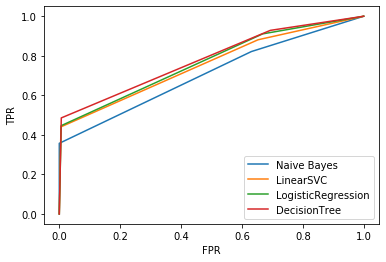

In [ ]:
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

def roc_auc_plot(classifier):
  TPR=0
  FPR=0
  for i, (feats, label_true) in enumerate(X_test):
    label_predicted = classifier.classify(feats)
    y_true.append(label2int(label_true))
    y_score.append(label2int(label_predicted))
    
  #print(y_true)
  # Precision-Recall AUC
  precision, recall, _ = precision_recall_curve(y_true, y_score, pos_label=1)
  pr_auc = auc(recall, precision)
  print ("Precision-Recall AUC:" ,pr_auc)
  # ROC AUC
  fpr, tpr, _ = roc_curve(y_true, y_score, pos_label=1)
  roc_auc = auc(fpr, tpr)
  print('ROC AUC:',roc_auc)
  print(metrics.classification_report(y_true,y_score))
  plt.plot(fpr,tpr)
  #plt.figure()
  plt.xlabel("FPR")
  plt.ylabel("TPR")
  
roc_auc_plot(classifier1)
roc_auc_plot(classifier2)
roc_auc_plot(classifier3)
roc_auc_plot(classifier4)
plt.legend(["Naive Bayes","LinearSVC","LogisticRegression","DecisionTree"])

In [ ]:
training_set = featuresets[:800]

# set that we'll test against.
testing_set = featuresets[800 :]

classifier = nltk.NaiveBayesClassifier.train(training_set)

print("Classifier accuracy percent:",(nltk.classify.accuracy(classifier, testing_set))*100)

Classifier accuracy percent: 60.5


In [ ]:
def train(cls, labeled_featuresets, estimator=ELEProbDist):
        
        label_freqdist = FreqDist()
        feature_freqdist = defaultdict(FreqDist)
        feature_values = defaultdict(set)
        fnames = set()

        # Count up how many times each feature value occurred, given
        # the label and featurename.
        for featureset, label in labeled_featuresets:
            label_freqdist[label] += 1
            for fname, fval in featureset.items():
                # Increment freq(fval|label, fname)
                feature_freqdist[label, fname][fval] += 1
                # Record that fname can take the value fval.
                feature_values[fname].add(fval)
                # Keep a list of all feature names.
                fnames.add(fname)

        # If a feature didn't have a value given for an instance, then
        # we assume that it gets the implicit value 'None.'  This loop
        # counts up the number of 'missing' feature values for each
        # (label,fname) pair, and increments the count of the fval
        # 'None' by that amount.
        for label in label_freqdist:
            num_samples = label_freqdist[label]
            for fname in fnames:
                count = feature_freqdist[label, fname].N()
                # Only add a None key when necessary, i.e. if there are
                # any samples with feature 'fname' missing.
                if num_samples - count > 0:
                    feature_freqdist[label, fname][None] += num_samples - count
                    feature_values[fname].add(None)

        # Create the P(label) distribution
        label_probdist = estimator(label_freqdist)

        # Create the P(fval|label, fname) distribution
        feature_probdist = {}
        for ((label, fname), freqdist) in feature_freqdist.items():
            probdist = estimator(freqdist, bins=len(feature_values[fname]))
            feature_probdist[label, fname] = probdist

        return cls(label_probdist, feature_probdist)

In [ ]:
'''
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

def label2int(label):
    #print(label)
    if label == 1:
        return 1
    elif label == 0:
        return 0
    else:
      return -1

y_true, y_score = [], []

for i, (feats, label_true) in enumerate(X_test):
    label_predicted = classifier1.classify(feats)
    y_true.append(label2int(label_true))
    y_score.append(label2int(label_predicted))
#print(y_true)
# Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_true, y_score, pos_label=1)
pr_auc = auc(recall, precision)
print ("Precision-Recall AUC:" ,pr_auc)
# ROC AUC
fpr, tpr, _ = roc_curve(y_true, y_score, pos_label=1)
roc_auc = auc(fpr, tpr)
print('ROC AUC:',roc_auc)
plt.plot(fpr,tpr)'''

'\nfrom sklearn.metrics import precision_recall_curve\nfrom sklearn.metrics import roc_curve\nfrom sklearn.metrics import auc\nimport matplotlib.pyplot as plt\n\ndef label2int(label):\n    #print(label)\n    if label == 1:\n        return 1\n    elif label == 0:\n        return 0\n    else:\n      return -1\n\ny_true, y_score = [], []\n\nfor i, (feats, label_true) in enumerate(X_test):\n    label_predicted = classifier1.classify(feats)\n    y_true.append(label2int(label_true))\n    y_score.append(label2int(label_predicted))\n#print(y_true)\n# Precision-Recall AUC\nprecision, recall, _ = precision_recall_curve(y_true, y_score, pos_label=1)\npr_auc = auc(recall, precision)\nprint ("Precision-Recall AUC:" ,pr_auc)\n# ROC AUC\nfpr, tpr, _ = roc_curve(y_true, y_score, pos_label=1)\nroc_auc = auc(fpr, tpr)\nprint(\'ROC AUC:\',roc_auc)\nplt.plot(fpr,tpr)'

In [ ]:
import re
import string
s='a very good game that could have been a lot better'
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): return re_tok.sub(r' \1 ', s).split()
print(tokenize(re_tok.s))

AttributeError: ignored

In [ ]:
#@title Default title text
import string
s='a very good game that ,,could have been a lot better'
s=s.translate(str.maketrans('','',string.punctuation))
print(s)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(tokenizer=tokenize)
tf_train = vect.fit_transform(X_train)
tf_test = vect.transform(X_test)
tf_train
tf_test

In [ ]:
print("Positive headlines:\n")
print(list(df[df['label'] == 1].headline)[:5])

print("\nNegative headlines:\n")
print(list(df[df['label'] == -1].headline)[:5])

In [ ]:
#Next we have to check for the datapoints imbalancy which has to be done yet

print(df.label.value_counts())

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()